# Modelo predictivo llamadas Contact Center
## Notebook 3 - Análisis de datos

## Importacion de librerias 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

pd.options.display.max_columns = None

## Analisis Datos envíos

In [2]:
df_Envios = pd.read_pickle('./data/df_Envios')

##### Diagrama de correlación para el total de envios

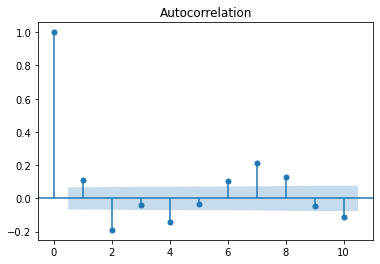

In [3]:
fig = plot_acf(df_Envios['total'], lags=10, alpha=0.05)

In [4]:
df_Envios['total'].autocorr(lag=7), df_Envios['total'].autocorr(lag=14), df_Envios['total'].autocorr(lag=21)

(0.21367008437377788, 0.11611979553792952, 0.1825426651556608)

##### Distribucion de los envíos

<AxesSubplot:>

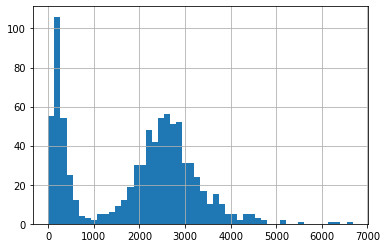

In [5]:
df_Envios['total'].hist(bins=50)

In [6]:
df_Envios['total'].describe()

count     851.000000
mean     1946.068155
std      1276.674395
min         1.000000
25%       389.500000
50%      2273.000000
75%      2829.000000
max      6675.000000
Name: total, dtype: float64

<AxesSubplot:xlabel='Fecha envío'>

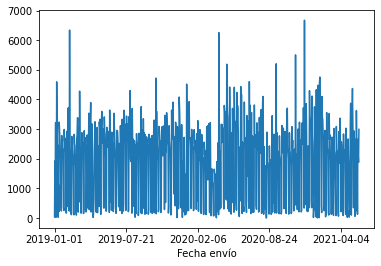

In [7]:
df_Envios['total'].plot()

## Analisis Datos de llamadas

In [8]:
df_Call = pd.read_pickle('./data/df_Call')

##### Diagrama de correlación para el total de llamadas

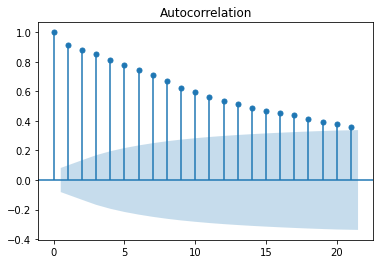

In [9]:
fig = plot_acf(df_Call['dateCreacion'], lags=21, alpha=0.05)

##### Distribución de las llamadas

<AxesSubplot:>

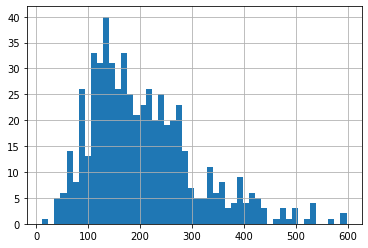

In [10]:
df_Call['dateCreacion'].hist(bins=50)

In [11]:
df_Call['dateCreacion'].describe()

count    575.000000
mean     205.789565
std      103.396648
min       11.000000
25%      130.000000
50%      185.000000
75%      259.000000
max      598.000000
Name: dateCreacion, dtype: float64

## Unión de los datos de llamadas y los datos de envios

##### Se utiliza la fecha para unir los dataframes de esta manera, tenemos el total de envios con el todal de llamadas en ese dia

In [12]:
df_Envios.head(2)

,total,Friday,Monday,Thursday,Tuesday,Wednesday
Fecha envío,,,,,,
2019-01-01,33,0,0,0,1,0
2019-01-02,1923,0,0,0,0,1


In [13]:
seleccion = ['total', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

In [14]:
df_Envios = df_Envios[seleccion]
df_Envios.head(2)

,total,Monday,Tuesday,Wednesday,Thursday,Friday
Fecha envío,,,,,,
2019-01-01,33,0,1,0,0,0
2019-01-02,1923,0,0,1,0,0


In [15]:
df = pd.concat([df_Envios, df_Call], axis=1).reset_index()
df.head()

,index,total,Monday,Tuesday,Wednesday,Thursday,Friday,dateCreacion
0,2019-01-01,33.0,0.0,1.0,0.0,0.0,0.0,NaN
1,2019-01-02,1923.0,0.0,0.0,1.0,0.0,0.0,281.0
2,2019-01-03,1408.0,0.0,0.0,0.0,1.0,0.0,283.0
3,2019-01-04,3220.0,0.0,0.0,0.0,0.0,1.0,351.0
4,2019-01-05,23.0,0.0,0.0,0.0,0.0,0.0,NaN


In [16]:
df['Fecha'] = df['index']
df.drop('index', axis='columns', inplace=True)

In [17]:
ordenado = ['Fecha', 'total', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'dateCreacion']
df = df[ordenado]
df.head()

,Fecha,total,Monday,Tuesday,Wednesday,Thursday,Friday,dateCreacion
0,2019-01-01,33.0,0.0,1.0,0.0,0.0,0.0,NaN
1,2019-01-02,1923.0,0.0,0.0,1.0,0.0,0.0,281.0
2,2019-01-03,1408.0,0.0,0.0,0.0,1.0,0.0,283.0
3,2019-01-04,3220.0,0.0,0.0,0.0,0.0,1.0,351.0
4,2019-01-05,23.0,0.0,0.0,0.0,0.0,0.0,NaN


### Eliminación de NaN
Muchos festivos la empresa de transporte trabaja pero no se presta servicio de contact center.

In [18]:
df.dropna(inplace=True)

### Correlacin entre los datos

In [19]:
df[['dateCreacion','total']].corr()

,dateCreacion,total
dateCreacion,1.000000,0.048328
total,0.048328,1.000000


In [20]:
df.corr('pearson')

,total,Monday,Tuesday,Wednesday,Thursday,Friday,dateCreacion
total,1.000000,0.181371,-0.021687,-0.004725,-0.004545,-0.152010,0.048328
Monday,0.181371,1.000000,-0.253309,-0.251918,-0.247738,-0.239334,-0.010454
Tuesday,-0.021687,-0.253309,1.000000,-0.260521,-0.256198,-0.247507,-0.043362
Wednesday,-0.004725,-0.251918,-0.260521,1.000000,-0.254792,-0.246149,-0.004550
Thursday,-0.004545,-0.247738,-0.256198,-0.254792,1.000000,-0.242065,-0.002815
Friday,-0.152010,-0.239334,-0.247507,-0.246149,-0.242065,1.000000,0.063044
dateCreacion,0.048328,-0.010454,-0.043362,-0.004550,-0.002815,0.063044,1.000000


In [21]:
df.head()

,Fecha,total,Monday,Tuesday,Wednesday,Thursday,Friday,dateCreacion
1,2019-01-02,1923.0,0.0,0.0,1.0,0.0,0.0,281.0
2,2019-01-03,1408.0,0.0,0.0,0.0,1.0,0.0,283.0
3,2019-01-04,3220.0,0.0,0.0,0.0,0.0,1.0,351.0
6,2019-01-07,4595.0,1.0,0.0,0.0,0.0,0.0,173.0
7,2019-01-08,2924.0,0.0,1.0,0.0,0.0,0.0,174.0


In [22]:
'''df.iloc[:,1:-6] = np.log(df.iloc[:,1:-1]).replace(-np.inf, 0)
df.head()'''

'df.iloc[:,1:-6] = np.log(df.iloc[:,1:-1]).replace(-np.inf, 0)\ndf.head()'

In [23]:
'''x = np.array(df['index'])

llamadas = np.array(df['dateCreacion'])
envios = np.array(df['total'])'''

"x = np.array(df['index'])\n\nllamadas = np.array(df['dateCreacion'])\nenvios = np.array(df['total'])"

In [24]:
'''plt.scatter(x, envios, c='black')
plt.scatter(x, llamadas, c='blue', alpha=.5)'''

"plt.scatter(x, envios, c='black')\nplt.scatter(x, llamadas, c='blue', alpha=.5)"

In [25]:
df.dateCreacion.describe()[0] ##Registros

554.0

## Data Engineering
#### Preparación del dataframe para los modelos

In [26]:
df.head()

,Fecha,total,Monday,Tuesday,Wednesday,Thursday,Friday,dateCreacion
1,2019-01-02,1923.0,0.0,0.0,1.0,0.0,0.0,281.0
2,2019-01-03,1408.0,0.0,0.0,0.0,1.0,0.0,283.0
3,2019-01-04,3220.0,0.0,0.0,0.0,0.0,1.0,351.0
6,2019-01-07,4595.0,1.0,0.0,0.0,0.0,0.0,173.0
7,2019-01-08,2924.0,0.0,1.0,0.0,0.0,0.0,174.0


#### Creacioón de parámetros sobre cantidad envios

In [27]:
df['envioslag1'] = df['total'].shift(periods=1)
df['envioslag6'] = df['total'].shift(periods=6)
df['envioslag7'] = df['total'].shift(periods=7)
df['envioslag8'] = df['total'].shift(periods=8)
df.head(15)

,Fecha,total,Monday,Tuesday,Wednesday,Thursday,Friday,dateCreacion,envioslag1,envioslag6,envioslag7,envioslag8
1,2019-01-02,1923.0,0.0,0.0,1.0,0.0,0.0,281.0,NaN,NaN,NaN,NaN
2,2019-01-03,1408.0,0.0,0.0,0.0,1.0,0.0,283.0,1923.0,NaN,NaN,NaN
3,2019-01-04,3220.0,0.0,0.0,0.0,0.0,1.0,351.0,1408.0,NaN,NaN,NaN
6,2019-01-07,4595.0,1.0,0.0,0.0,0.0,0.0,173.0,3220.0,NaN,NaN,NaN
7,2019-01-08,2924.0,0.0,1.0,0.0,0.0,0.0,174.0,4595.0,NaN,NaN,NaN
8,2019-01-09,289.0,0.0,0.0,1.0,0.0,0.0,227.0,2924.0,NaN,NaN,NaN
9,2019-01-10,2461.0,0.0,0.0,0.0,1.0,0.0,236.0,289.0,1923.0,NaN,NaN
10,2019-01-11,23.0,0.0,0.0,0.0,0.0,1.0,270.0,2461.0,1408.0,1923.0,NaN
13,2019-01-14,3237.0,1.0,0.0,0.0,0.0,0.0,260.0,23.0,3220.0,1408.0,1923.0
14,2019-01-15,2911.0,0.0,1.0,0.0,0.0,0.0,259.0,3237.0,4595.0,3220.0,1408.0


In [28]:
df['envios'] = df['total']
df.drop('total', axis='columns', inplace=True)
df.head()

,Fecha,Monday,Tuesday,Wednesday,Thursday,Friday,dateCreacion,envioslag1,envioslag6,envioslag7,envioslag8,envios
1,2019-01-02,0.0,0.0,1.0,0.0,0.0,281.0,NaN,NaN,NaN,NaN,1923.0
2,2019-01-03,0.0,0.0,0.0,1.0,0.0,283.0,1923.0,NaN,NaN,NaN,1408.0
3,2019-01-04,0.0,0.0,0.0,0.0,1.0,351.0,1408.0,NaN,NaN,NaN,3220.0
6,2019-01-07,1.0,0.0,0.0,0.0,0.0,173.0,3220.0,NaN,NaN,NaN,4595.0
7,2019-01-08,0.0,1.0,0.0,0.0,0.0,174.0,4595.0,NaN,NaN,NaN,2924.0


## Añadir parámetros estacionales
#### En base a los lag que vamos a calcular de las llamadas

In [29]:
df['sinlag1'] = np.sin(2*np.pi*(1/1)*df.index)
df['coslag1'] = np.cos(2*np.pi*(1/1)*df.index)

df['sinlag2'] = np.sin(2*np.pi*(1/2)*df.index)
df['coslag2'] = np.cos(2*np.pi*(1/2)*df.index)

df['sinlag3'] = np.sin(2*np.pi*(1/3)*df.index)
df['coslag3'] = np.cos(2*np.pi*(1/3)*df.index)

df['sinlag4'] = np.sin(2*np.pi*(1/4)*df.index)
df['coslag4'] = np.cos(2*np.pi*(1/4)*df.index)

df['sinlag5'] = np.sin(2*np.pi*(1/5)*df.index)
df['coslag5'] = np.cos(2*np.pi*(1/5)*df.index)

df['sinlag6'] = np.sin(2*np.pi*(1/6)*df.index)
df['coslag6'] = np.cos(2*np.pi*(1/6)*df.index)

df['sinlag7'] = np.sin(2*np.pi*(1/7)*df.index)
df['coslag7'] = np.cos(2*np.pi*(1/7)*df.index)

#### Creación de parámetros sobre cantidad de llamadas

In [30]:
df['llamadaslag1'] = df['dateCreacion'].shift(periods=1)
df['llamadaslag2'] = df['dateCreacion'].shift(periods=2)
df['llamadaslag3'] = df['dateCreacion'].shift(periods=3)
df['llamadaslag4'] = df['dateCreacion'].shift(periods=4)
df['llamadaslag5'] = df['dateCreacion'].shift(periods=5)
df['llamadaslag6'] = df['dateCreacion'].shift(periods=6)
df['llamadaslag7'] = df['dateCreacion'].shift(periods=7)
df.head(15)

,Fecha,Monday,Tuesday,Wednesday,Thursday,Friday,dateCreacion,envioslag1,envioslag6,envioslag7,envioslag8,envios,sinlag1,coslag1,sinlag2,coslag2,sinlag3,coslag3,sinlag4,coslag4,sinlag5,coslag5,sinlag6,coslag6,sinlag7,coslag7,llamadaslag1,llamadaslag2,llamadaslag3,llamadaslag4,llamadaslag5,llamadaslag6,llamadaslag7
1,2019-01-02,0.0,0.0,1.0,0.0,0.0,281.0,NaN,NaN,NaN,NaN,1923.0,-2.449294e-16,1.0,1.224647e-16,-1.0,8.660254e-01,-0.5,1.000000e+00,6.123234e-17,9.510565e-01,0.309017,8.660254e-01,0.5,7.818315e-01,0.623490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,0.0,0.0,0.0,1.0,0.0,283.0,1923.0,NaN,NaN,NaN,1408.0,-4.898587e-16,1.0,-2.449294e-16,1.0,-8.660254e-01,-0.5,1.224647e-16,-1.000000e+00,5.877853e-01,-0.809017,8.660254e-01,-0.5,9.749279e-01,-0.222521,281.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-04,0.0,0.0,0.0,0.0,1.0,351.0,1408.0,NaN,NaN,NaN,3220.0,-7.347881e-16,1.0,3.673940e-16,-1.0,-2.449294e-16,1.0,-1.000000e+00,-1.836970e-16,-5.877853e-01,-0.809017,1.224647e-16,-1.0,4.338837e-01,-0.900969,283.0,281.0,NaN,NaN,NaN,NaN,NaN
6,2019-01-07,1.0,0.0,0.0,0.0,0.0,173.0,3220.0,NaN,NaN,NaN,4595.0,-1.469576e-15,1.0,-7.347881e-16,1.0,-4.898587e-16,1.0,3.673940e-16,-1.000000e+00,9.510565e-01,0.309017,-2.449294e-16,1.0,-7.818315e-01,0.623490,351.0,283.0,281.0,NaN,NaN,NaN,NaN
7,2019-01-08,0.0,1.0,0.0,0.0,0.0,174.0,4595.0,NaN,NaN,NaN,2924.0,-1.714506e-15,1.0,8.572528e-16,-1.0,8.660254e-01,-0.5,-1.000000e+00,-4.286264e-16,5.877853e-01,-0.809017,8.660254e-01,0.5,-2.449294e-16,1.000000,173.0,351.0,283.0,281.0,NaN,NaN,NaN
8,2019-01-09,0.0,0.0,1.0,0.0,0.0,227.0,2924.0,NaN,NaN,NaN,289.0,-1.959435e-15,1.0,-9.797174e-16,1.0,-8.660254e-01,-0.5,-4.898587e-16,1.000000e+00,-5.877853e-01,-0.809017,8.660254e-01,-0.5,7.818315e-01,0.623490,174.0,173.0,351.0,283.0,281.0,NaN,NaN
9,2019-01-10,0.0,0.0,0.0,1.0,0.0,236.0,289.0,1923.0,NaN,NaN,2461.0,-2.204364e-15,1.0,1.102182e-15,-1.0,-7.347881e-16,1.0,1.000000e+00,5.510911e-16,-9.510565e-01,0.309017,3.673940e-16,-1.0,9.749279e-01,-0.222521,227.0,174.0,173.0,351.0,283.0,281.0,NaN
10,2019-01-11,0.0,0.0,0.0,0.0,1.0,270.0,2461.0,1408.0,1923.0,NaN,23.0,-2.449294e-15,1.0,-1.224647e-15,1.0,8.660254e-01,-0.5,6.123234e-16,-1.000000e+00,-4.898587e-16,1.000000,-8.660254e-01,-0.5,4.338837e-01,-0.900969,236.0,227.0,174.0,173.0,351.0,283.0,281.0
13,2019-01-14,1.0,0.0,0.0,0.0,0.0,260.0,23.0,3220.0,1408.0,1923.0,3237.0,3.921346e-15,1.0,-1.960673e-15,-1.0,8.660254e-01,-0.5,1.000000e+00,-9.803364e-16,-5.877853e-01,-0.809017,8.660254e-01,0.5,-7.818315e-01,0.623490,270.0,236.0,227.0,174.0,173.0,351.0,283.0
14,2019-01-15,0.0,1.0,0.0,0.0,0.0,259.0,3237.0,4595.0,3220.0,1408.0,2911.0,-3.429011e-15,1.0,-1.714506e-15,1.0,-8.660254e-01,-0.5,8.572528e-16,-1.000000e+00,-9.510565e-01,0.309017,8.660254e-01,-0.5,-4.898587e-16,1.000000,260.0,270.0,236.0,227.0,174.0,173.0,351.0


In [31]:
df['llamadas'] = df['dateCreacion']
df.drop('dateCreacion', axis='columns', inplace=True)

In [32]:
df.head()

,Fecha,Monday,Tuesday,Wednesday,Thursday,Friday,envioslag1,envioslag6,envioslag7,envioslag8,envios,sinlag1,coslag1,sinlag2,coslag2,sinlag3,coslag3,sinlag4,coslag4,sinlag5,coslag5,sinlag6,coslag6,sinlag7,coslag7,llamadaslag1,llamadaslag2,llamadaslag3,llamadaslag4,llamadaslag5,llamadaslag6,llamadaslag7,llamadas
1,2019-01-02,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,1923.0,-2.449294e-16,1.0,1.224647e-16,-1.0,8.660254e-01,-0.5,1.000000e+00,6.123234e-17,0.951057,0.309017,8.660254e-01,0.5,7.818315e-01,0.623490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.0
2,2019-01-03,0.0,0.0,0.0,1.0,0.0,1923.0,NaN,NaN,NaN,1408.0,-4.898587e-16,1.0,-2.449294e-16,1.0,-8.660254e-01,-0.5,1.224647e-16,-1.000000e+00,0.587785,-0.809017,8.660254e-01,-0.5,9.749279e-01,-0.222521,281.0,NaN,NaN,NaN,NaN,NaN,NaN,283.0
3,2019-01-04,0.0,0.0,0.0,0.0,1.0,1408.0,NaN,NaN,NaN,3220.0,-7.347881e-16,1.0,3.673940e-16,-1.0,-2.449294e-16,1.0,-1.000000e+00,-1.836970e-16,-0.587785,-0.809017,1.224647e-16,-1.0,4.338837e-01,-0.900969,283.0,281.0,NaN,NaN,NaN,NaN,NaN,351.0
6,2019-01-07,1.0,0.0,0.0,0.0,0.0,3220.0,NaN,NaN,NaN,4595.0,-1.469576e-15,1.0,-7.347881e-16,1.0,-4.898587e-16,1.0,3.673940e-16,-1.000000e+00,0.951057,0.309017,-2.449294e-16,1.0,-7.818315e-01,0.623490,351.0,283.0,281.0,NaN,NaN,NaN,NaN,173.0
7,2019-01-08,0.0,1.0,0.0,0.0,0.0,4595.0,NaN,NaN,NaN,2924.0,-1.714506e-15,1.0,8.572528e-16,-1.0,8.660254e-01,-0.5,-1.000000e+00,-4.286264e-16,0.587785,-0.809017,8.660254e-01,0.5,-2.449294e-16,1.000000,173.0,351.0,283.0,281.0,NaN,NaN,NaN,174.0


## Elimnar NaN debido a la creacion de los lags

In [33]:
df.dropna(inplace=True)

In [34]:
df.reset_index(inplace=True)
df.head(1)['Fecha'],df.tail(1)['Fecha']

(0    2019-01-14
 Name: Fecha, dtype: object,
 545    2021-04-21
 Name: Fecha, dtype: object)

In [35]:
df.drop('index', axis='columns', inplace=True)
df.head()

,Fecha,Monday,Tuesday,Wednesday,Thursday,Friday,envioslag1,envioslag6,envioslag7,envioslag8,envios,sinlag1,coslag1,sinlag2,coslag2,sinlag3,coslag3,sinlag4,coslag4,sinlag5,coslag5,sinlag6,coslag6,sinlag7,coslag7,llamadaslag1,llamadaslag2,llamadaslag3,llamadaslag4,llamadaslag5,llamadaslag6,llamadaslag7,llamadas
0,2019-01-14,1.0,0.0,0.0,0.0,0.0,23.0,3220.0,1408.0,1923.0,3237.0,3.921346e-15,1.0,-1.960673e-15,-1.0,8.660254e-01,-0.5,1.000000e+00,-9.803364e-16,-5.877853e-01,-0.809017,8.660254e-01,0.5,-7.818315e-01,0.623490,270.0,236.0,227.0,174.0,173.0,351.0,283.0,260.0
1,2019-01-15,0.0,1.0,0.0,0.0,0.0,3237.0,4595.0,3220.0,1408.0,2911.0,-3.429011e-15,1.0,-1.714506e-15,1.0,-8.660254e-01,-0.5,8.572528e-16,-1.000000e+00,-9.510565e-01,0.309017,8.660254e-01,-0.5,-4.898587e-16,1.000000,260.0,270.0,236.0,227.0,174.0,173.0,351.0,259.0
2,2019-01-16,0.0,0.0,1.0,0.0,0.0,2911.0,2924.0,4595.0,3220.0,2639.0,-1.077937e-14,1.0,5.389684e-15,-1.0,-4.777360e-15,1.0,-1.000000e+00,-2.694842e-15,-7.347881e-16,1.000000,2.388680e-15,-1.0,7.818315e-01,0.623490,259.0,260.0,270.0,236.0,227.0,174.0,173.0,227.0
3,2019-01-17,0.0,0.0,0.0,1.0,0.0,2639.0,289.0,2924.0,4595.0,2056.0,-3.918870e-15,1.0,-1.959435e-15,1.0,8.660254e-01,-0.5,-9.797174e-16,1.000000e+00,9.510565e-01,0.309017,-8.660254e-01,-0.5,9.749279e-01,-0.222521,227.0,259.0,260.0,270.0,236.0,227.0,174.0,142.0
4,2019-01-18,0.0,0.0,0.0,0.0,1.0,2056.0,2461.0,289.0,2924.0,2005.0,2.941628e-15,1.0,-1.470814e-15,-1.0,-8.660254e-01,-0.5,1.000000e+00,-7.354071e-16,5.877853e-01,-0.809017,-8.660254e-01,0.5,4.338837e-01,-0.900969,142.0,227.0,259.0,260.0,270.0,236.0,227.0,277.0


## Grabar datos en pickle

In [36]:
df.to_pickle('./data/df_data')